In [30]:
%pip install "scikit-learn<1.6"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [3]:
len(train), len(test)

(1200000, 800000)

In [4]:
df = pd.concat([train, test], axis=0)

In [5]:
del df['id']

In [6]:
# annual income & premium amount has a long tail -> log transformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
# df['Annual Income'] = log_transformer.fit_transform(df[['Annual Income']])
df['Premium Amount'] = log_transformer.fit_transform(df[['Premium Amount']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


In [7]:
# Insurance Duration, Age, Number of Dependents null -> mode & -1(Unknown)
for col in ['Insurance Duration', 'Age', 'Number of Dependents']:
    df[col+'_1'] = df[col].fillna(df[col].mode()[0])
    df[col] = df[col].fillna(-1)

# Annual Income, Health Score, Credit Score null -> mean & -1(Unknown)
for col in ['Vehicle Age', 'Annual Income', 'Health Score', 'Credit Score']:
    df[col+'_1'] = df[col].fillna(df[col].mean())
    df[col] = df[col].fillna(-1)

# Marital Status, Occupation, Customer Feedback null -> Unknown
for col in ['Marital Status', 'Occupation', 'Customer Feedback']:
    df[col].fillna('Unknown', inplace=True)

<ipython-input-7-939b0add4823>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


<Axes: >

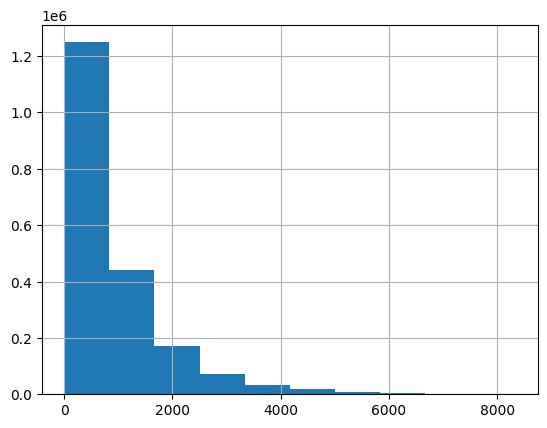

In [8]:
# Annual Income / Age
df['Ratio of Annual Income and Age'] = df['Annual Income_1'] / df['Age_1']
df['Ratio of Annual Income and Age'].hist(bins=10)

<Axes: >

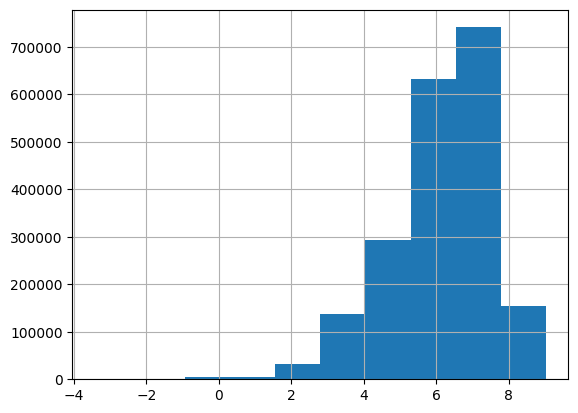

In [9]:
df['Ratio of Annual Income and Age'] = log_transformer.fit_transform(df[['Ratio of Annual Income and Age']])
df['Ratio of Annual Income and Age'].hist(bins=10)

In [10]:
del df['Annual Income']
del df['Annual Income_1']

In [11]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Age                             2000000 non-null  float64
 1   Gender                          2000000 non-null  object 
 2   Marital Status                  2000000 non-null  object 
 3   Number of Dependents            2000000 non-null  float64
 4   Education Level                 2000000 non-null  object 
 5   Occupation                      2000000 non-null  object 
 6   Health Score                    2000000 non-null  float64
 7   Location                        2000000 non-null  object 
 8   Policy Type                     2000000 non-null  object 
 9   Previous Claims                 1393169 non-null  float64
 10  Vehicle Age                     2000000 non-null  float64
 11  Credit Score                    2000000 non-null  float64
 12  Insura

In [12]:
# convert 'Policy Start Date' to 'Policy Start Year'
df1 = df.copy()
df1['Policy Start Date'] = pd.to_datetime(df1['Policy Start Date'])
df1['Policy Start Year'] = pd.DatetimeIndex(df1['Policy Start Date']).year
df1['Policy Start Year'].astype('object')
df['Policy Start Year'] = df1['Policy Start Year'].astype('object')
del df['Policy Start Date']
df.insert(14, 'Policy Start Year', df.pop('Policy Start Year'))

In [13]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Age                             2000000 non-null  float64
 1   Gender                          2000000 non-null  object 
 2   Marital Status                  2000000 non-null  object 
 3   Number of Dependents            2000000 non-null  float64
 4   Education Level                 2000000 non-null  object 
 5   Occupation                      2000000 non-null  object 
 6   Health Score                    2000000 non-null  float64
 7   Location                        2000000 non-null  object 
 8   Policy Type                     2000000 non-null  object 
 9   Previous Claims                 1393169 non-null  float64
 10  Vehicle Age                     2000000 non-null  float64
 11  Credit Score                    2000000 non-null  float64
 12  Insura

In [14]:
df = pd.get_dummies(df, dtype='int')

In [15]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 54 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Age                             2000000 non-null  float64
 1   Number of Dependents            2000000 non-null  float64
 2   Health Score                    2000000 non-null  float64
 3   Previous Claims                 1393169 non-null  float64
 4   Vehicle Age                     2000000 non-null  float64
 5   Credit Score                    2000000 non-null  float64
 6   Insurance Duration              2000000 non-null  float64
 7   Premium Amount                  1200000 non-null  float64
 8   Insurance Duration_1            2000000 non-null  float64
 9   Age_1                           2000000 non-null  float64
 10  Number of Dependents_1          2000000 non-null  float64
 11  Vehicle Age_1                   2000000 non-null  float64
 12  Health

In [16]:
%pip install catboost

In [17]:
%pip install lightbgm

ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm


In [18]:
# make a regression model to predict previous claims
df_previous_claims = df[df['Previous Claims'].notna()]
df_no_previous_claims = df[df['Previous Claims'].isna()]

del df_previous_claims['Premium Amount']
del df_no_previous_claims['Premium Amount']

# train_test split
from sklearn.model_selection import train_test_split
train_set, test_set_from_train = train_test_split(df_previous_claims, test_size=0.2, random_state=42)

# split target and features
X_train = df_previous_claims.drop('Previous Claims', axis=1)
y_train = df_previous_claims['Previous Claims'].copy()

# build model
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor as Catboost
from lightgbm import LGBMRegressor

stacking_reg = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('LGBM', LGBMRegressor(n_estimators=73, max_depth=10, random_state=42)),
        ('xgboost', xgb.XGBRegressor(max_depth=8, n_estimators=50, random_state=42)),
        ('catboost',Catboost(iterations=40, depth=7, learning_rate=1, random_state=42)),
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1,
    cv=3
)
stacking_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


StackingRegressor(cv=3,
                  estimators=[('lr', LinearRegression()),
                              ('LGBM',
                               LGBMRegressor(max_depth=10, n_estimators=73,
                                             random_state=42)),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feat...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x7a9de2bedb40>)],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [19]:
# test
X_test = test_set_from_train.drop('Previous Claims', axis=1)
y_test = test_set_from_train['Previous Claims'].copy()

y_pred = stacking_reg.predict(X_test)

from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.9556512108302583

In [20]:
test_set = df_no_previous_claims.copy()
del test_set['Previous Claims']
y_pred = stacking_reg.predict(test_set)

# fill nan of df['Previous Claims'] with y_pred
df.loc[df['Previous Claims'].isna(), 'Previous Claims'] = y_pred

In [21]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 54 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Age                             2000000 non-null  float64
 1   Number of Dependents            2000000 non-null  float64
 2   Health Score                    2000000 non-null  float64
 3   Previous Claims                 2000000 non-null  float64
 4   Vehicle Age                     2000000 non-null  float64
 5   Credit Score                    2000000 non-null  float64
 6   Insurance Duration              2000000 non-null  float64
 7   Premium Amount                  1200000 non-null  float64
 8   Insurance Duration_1            2000000 non-null  float64
 9   Age_1                           2000000 non-null  float64
 10  Number of Dependents_1          2000000 non-null  float64
 11  Vehicle Age_1                   2000000 non-null  float64
 12  Health

In [22]:
train = df.iloc[:len(train)]
test = df.iloc[len(train):]

In [23]:
train.to_csv('10_train.csv', index=False)
test.to_csv('10_test.csv', index=False)